# Clean And Analyze Employee Exit Surveys

The purpose of this project is to enhance & strengthen the cleaning, tranforming and combining process of dataset(s), using Pandas and Numpy modules. For plots and charts Matplotlib, Seaborn and Plotly have been used. 

<b>Datasets:</b> The project involves two datasets, exit surveys from employees of - the Department of Education, Training and Employment, in short we will label it as DETE, and - the Technical and Further Education institute in Queensland, Australia in short labeled as TAFE.

The datasets are available at the links below:
- [DETE dataset](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
- [TAFE dataset](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

<b>(Learned &) Applied Workflow:</b> Project has the requisite of combining the datasets and then performing any analysis. The challenge is - both the surveys essentially used the same template, but TAFE customized some of the answers to the survey. Hence the project involves and supplements understanding of data cleaning, transforming and combining skills. 
    
Due to lack of a proper data dictionary about the datasets, general info on the columns present has been considered.

Few of the columns from the DETE dataset (dete_survey.csv):

|Column|Description|
|---|---|
|ID|An id used to identify the participant of the survey|
|SeparationType|The reason why the person's employment ended|
|Cease Date|The year or month the person's employment ended|
|DETE Start Date|The year the person began employment with the DETE|

Few of the columns from the TAFE dataset (tafe_survey.csv):

|Column|Description|
|---|---|
|Record ID|An id used to identify the participant of the survey|
|Reason for ceasing employment|The reason why the person's employment ended|
|LengthofServiceOverall. Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|

Let's get going!

## Import the Libraries

In [1]:
# magic line to get plots in the jupyter file itself
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import plotly.io as pio

pio.templates.default = "simple_white"
pd.set_option('mode.chained_assignment', None)

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read the datasets

In [2]:
# to identify encoding of the data files
for each_file in ["dete_survey.csv", "tafe_survey.csv"]:
    with open(each_file) as f:
        print(f)

<_io.TextIOWrapper name='dete_survey.csv' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='tafe_survey.csv' mode='r' encoding='cp1252'>


In [3]:
dete_survey = pd.read_csv("dete_survey.csv", encoding="cp1252", na_values="Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv", encoding="cp1252")

## Explore the datasets

In [4]:
# DETE info
print("Row and Column Count for DETE:", dete_survey.shape)
print("Row and Column Count for DETE:", tafe_survey.shape)

Row and Column Count for DETE: (822, 56)
Row and Column Count for DETE: (702, 72)


In [5]:
# Since the datasets DETE and TAFE have 56 and 72 columns repectively, 
# only the number of columns segregated by various datatypes are displayed

dete_survey.info(verbose = False)
print("\n")
tafe_survey.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Columns: 56 entries, ID to NESB
dtypes: bool(18), float64(2), int64(1), object(35)
memory usage: 258.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 72 entries, Record ID to LengthofServiceCurrent. Length of Service at current workplace (in years)
dtypes: float64(2), object(70)
memory usage: 395.0+ KB


## Overview of datasets using Seaborn Heatmap

The heatmap of the datasets would help in quick analysis of how much data is missing from the datasets. The columns with more null values than non-null values can then easily be identified and dropped.

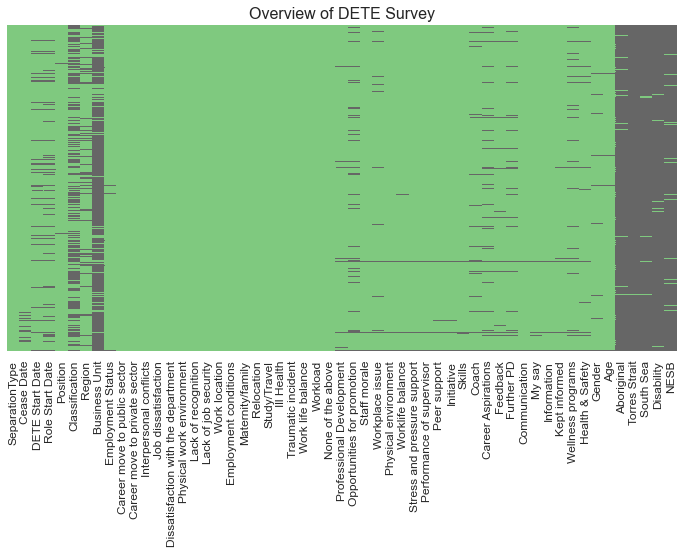

In [6]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.heatmap(dete_survey.set_index("ID").notnull(), cbar = False, cmap = "Accent_r")
ax.set_title("Overview of DETE Survey", fontsize = 16)

ax.set_yticks([])
ax.set_xticklabels(labels = dete_survey.set_index("ID").columns, fontdict = {"fontsize": 12})
ax.set_ylabel("")
plt.show()

As observed from the DETE heatmap, following columns have least amount of data. Hence they are the right candidates to be dropped from the dataframe at the onset:
- Classification
- Business Unit
- Aborginal
- Torress Strait
- South Sea
- Disability
- NESB 
    
Following columns show almost equal no. of rows with non-null values and null-values. And as they are not required for analysis, these columns can also be dropped:
- Oppurtunities for pormotion
- Coach
- Career Aspirations
- Further PD
- Wellness Programs
- Health and Safety
    
Several other columns may have more data than missing values, however, they are not required for the analysis and hence will be removed.

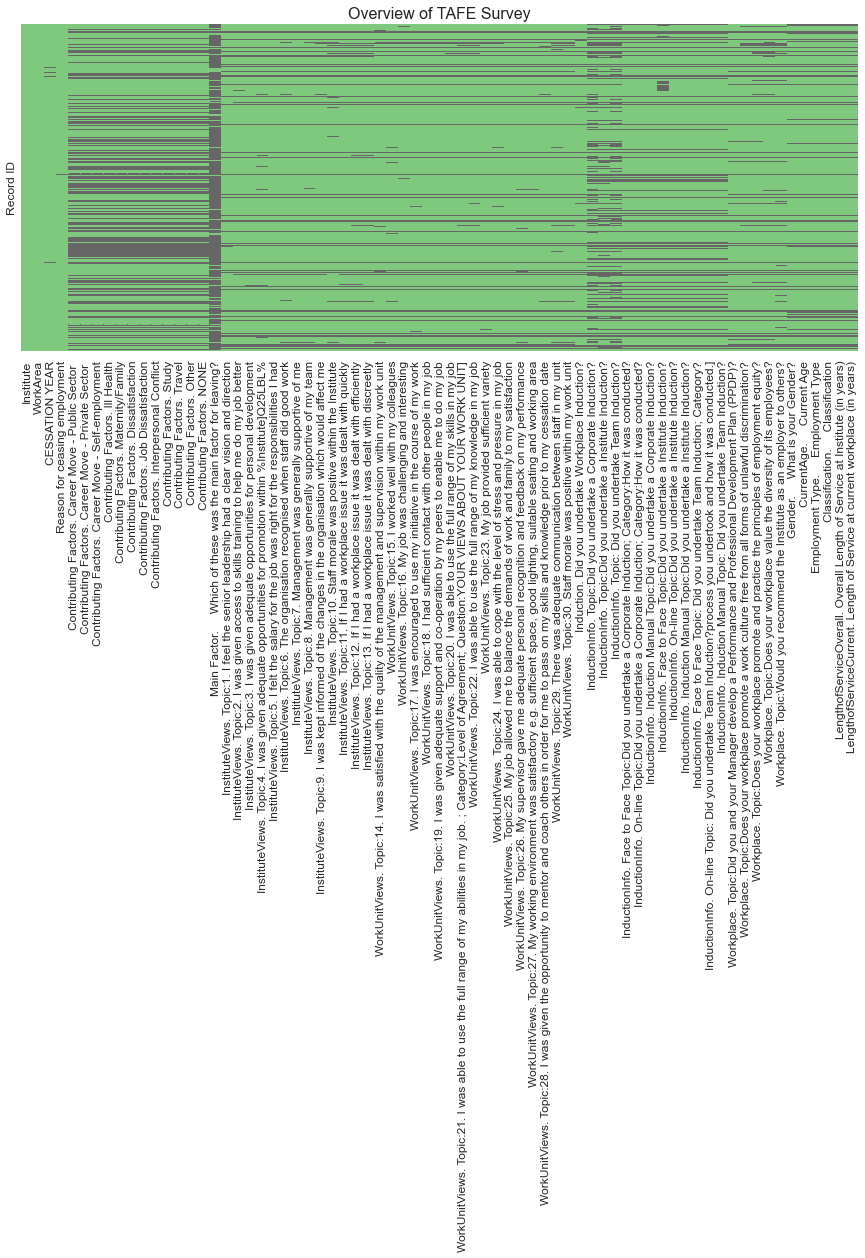

In [7]:
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.heatmap(tafe_survey.set_index("Record ID").notnull(), cbar = False, cmap = "Accent_r")
ax.set_title("Overview of TAFE Survey", fontsize = 16)

ax.set_yticks([])
ax.set_xticklabels(labels = tafe_survey.set_index("Record ID").columns, fontdict = {"fontsize": 12})

plt.show()

In the case of TAFE dataset, several records show missing values for most of the columns. This would mean, in addition of treating the dataset column-wise, we would need to clean the data row-wise as well.

## Examine first 5 and last 5 rows from datasets

In [8]:
pd.options.display.max_columns = 80
pd.options.display.max_colwidth = 50

dete_survey.head().append(dete_survey.tail())

ID                        SeparationType Cease Date  DETE Start Date  \
0      1                 Ill Health Retirement    08/2012           1984.0   
1      2      Voluntary Early Retirement (VER)    08/2012              NaN   
2      3      Voluntary Early Retirement (VER)    05/2012           2011.0   
3      4             Resignation-Other reasons    05/2012           2005.0   
4      5                        Age Retirement    05/2012           1970.0   
817  819                        Age Retirement    02/2014           1977.0   
818  820                        Age Retirement    01/2014           1980.0   
819  821  Resignation-Move overseas/interstate    01/2014           2009.0   
820  822                 Ill Health Retirement    12/2013           2001.0   
821  823  Resignation-Move overseas/interstate    12/2013              NaN   

     Role Start Date                                      Position  \
0             2004.0                                Public Servant   
1                NaN                                Public Servant   
2             2011.0                               Schools Officer   
3             2006.0                                       Teacher   
4             1989.0  Head of Curriculum/Head of Special Education   
817           1999.0                                       Teacher   
818           1980.0                                       Teacher   
819           2009.0                                Public Servant   
820           2009.0                                       Teacher   
821              NaN                                  Teacher Aide   

    Classification                    Region  \
0          A01-A04            Central Office   
1          AO5-AO7            Central Office   
2              NaN            Central Office   
3          Primary        Central Queensland   
4              NaN                South East   
817        Primary        Central Queensland   
818      Secondary               North Coast   
819        A01-A04            Central Office   
820      Secondary  Darling Downs South West   
821            NaN              Metropolitan   

                         Business Unit    Employment Status  \
0    Corporate Strategy and Peformance  Permanent Full-time   
1    Corporate Strategy and Peformance  Permanent Full-time   
2                 Education Queensland  Permanent Full-time   
3                                  NaN  Permanent Full-time   
4                                  NaN  Permanent Full-time   
817                                NaN  Permanent Part-time   
818                                NaN  Permanent Full-time   
819               Education Queensland  Permanent Full-time   
820                                NaN  Permanent Full-time   
821                                NaN                  NaN   

     Career move to public sector  Career move to private sector  \
0                            True                          False   
1                           False                          False   
2                           False                          False   
3                           False                           True   
4                           False                          False   
817                         False                          False   
818                         False                          False   
819                         False                          False   
820                         False                          False   
821                         False                          False   

     Interpersonal conflicts  Job dissatisfaction  \
0                      False                 True   
1                      False                False   
2                      False                False   
3                      False                False   
4                      False                False   
817                    False                False   
818                    False     

In [9]:
tafe_survey.head().append(tafe_survey.tail())

Record ID                              Institute  \
0    6.340000e+17  Southern Queensland Institute of TAFE   
1    6.340000e+17            Mount Isa Institute of TAFE   
2    6.340000e+17            Mount Isa Institute of TAFE   
3    6.340000e+17            Mount Isa Institute of TAFE   
4    6.340000e+17  Southern Queensland Institute of TAFE   
697  6.350000e+17         Barrier Reef Institute of TAFE   
698  6.350000e+17  Southern Queensland Institute of TAFE   
699  6.350000e+17       Tropical North Institute of TAFE   
700  6.350000e+17      Southbank Institute of Technology   
701  6.350000e+17       Tropical North Institute of TAFE   

                     WorkArea  CESSATION YEAR Reason for ceasing employment  \
0    Non-Delivery (corporate)          2010.0              Contract Expired   
1    Non-Delivery (corporate)          2010.0                    Retirement   
2         Delivery (teaching)          2010.0                    Retirement   
3    Non-Delivery (corporate)          2010.0                   Resignation   
4         Delivery (teaching)          2010.0                   Resignation   
697       Delivery (teaching)          2013.0                   Resignation   
698  Non-Delivery (corporate)          2013.0                   Resignation   
699       Delivery (teaching)          2013.0                   Resignation   
700  Non-Delivery (corporate)          2013.0              Contract Expired   
701  Non-Delivery (corporate)          2013.0                   Resignation   

    Contributing Factors. Career Move - Public Sector   \
0                                                  NaN   
1                                                    -   
2                                                    -   
3                                                    -   
4                                                    -   
697                        Career Move - Public Sector   
698                        Career Move - Public Sector   
699                                                  -   
700                                                NaN   
701                                                  -   

    Contributing Factors. Career Move - Private Sector   \
0                                                  NaN    
1                                                    -    
2                                                    -    
3                                                    -    
4                         Career Move - Private Sector    
697                                                  -    
698                                                  -    
699                                                  -    
700                                                NaN    
701                                                  -    

    Contributing Factors. Career Move - Self-employment  \
0                                                  NaN    
1                                                    -    
2                                                    -    
3                                                    -    
4                                                    -    
697                                                  -    
698                                                  -    
699                                                  -    
700                                                NaN    
701                      Career Move - Self-employment    

    Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                                NaN                                    NaN   
1                                  -                                      -   
2                                  -                                      -   
3                                  -                                      -   
4                                  -                                      -   
697                                -                            

## Preliminary Observations

- Some of the column names in both dataframes are common or similar.
- Some of the column names are too long with repeating headers/ classifiers.
- There are many columns with more than half the rows with missing values.
- Certain columns have missing values represented by fillers/ literals such as "-" or "?" etc.
- Columns such as "Cease Date", "Cessation Year" and "Current Age" have values in different formats or with extra literals.
- The survey response columns in DETE and TAFE have different values for the same response types.

  **For example:** For response "Strongly agree", value in DETE is **"sa"** and value in TAFE is **"Strongly Agree"**

## Drop columns not required for analysis

The columns which captured the survey responses, i.e. questionnaire answered by the employees, have been dropped from both the dataframes. This has been done as the analysis needs to be based on age, employment duration, and factors responsible for dissatisfaction.

In [10]:
print("Count of rows and columns before column drop - DETE:", dete_survey.shape)
print("Count of rows and columns before column drop - TAFE:", tafe_survey.shape, "\n")

# drop columns that are not required for analysis of exit survey
# using numpy.r_ object here to include the first columns, ID in DETE and "Record ID" in TAFE as well 
dete_survey_updated = dete_survey.drop(columns = dete_survey.columns[np.r_[0, 28:49]], axis=1)
tafe_survey_updated = tafe_survey.drop(columns = tafe_survey.columns[np.r_[0, 17:66]], axis=1)

print("Count of rows and columns after column drop - DETE:",  dete_survey_updated.shape)
print("Count of rows and columns after column drop - TAFE:", tafe_survey_updated.shape)

Count of rows and columns before column drop - DETE: (822, 56)
Count of rows and columns before column drop - TAFE: (702, 72) 

Count of rows and columns after column drop - DETE: (822, 34)
Count of rows and columns after column drop - TAFE: (702, 22)


## Rename/ Format column names

After removing unnecessary columns, in order to make the dataset more readable and workable, next thing to do is re-format overlyworded columns names to readable headers.

We would like to achieve a dataset like this: 

| dete_survey | tafe_survey | Definition |
| --- | --- | --- |
| SeparationType | Reason for ceasing employment | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| DETE Start Date | | The year the participant began employment with the DETE |
| | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years)| 
| Age | CurrentAge. Current Age | The age of the participant |
| Gender | Gender. What is your Gender? | The gender of the participant |

We can keep the other columns for additional analysis to perform.

In [11]:
# standardize column names for DETE
dete_survey_updated.columns = (dete_survey_updated.columns.str.replace('.', ' ').str.replace('\s+', '_').
                               str.strip().str.lower())

print("Cleaned column names in DETE:", "\n")
[col_name for col_name in dete_survey_updated.columns]

Cleaned column names in DETE: 



['separationtype',
 'cease_date',
 'dete_start_date',
 'role_start_date',
 'position',
 'classification',
 'region',
 'business_unit',
 'employment_status',
 'career_move_to_public_sector',
 'career_move_to_private_sector',
 'interpersonal_conflicts',
 'job_dissatisfaction',
 'dissatisfaction_with_the_department',
 'physical_work_environment',
 'lack_of_recognition',
 'lack_of_job_security',
 'work_location',
 'employment_conditions',
 'maternity/family',
 'relocation',
 'study/travel',
 'ill_health',
 'traumatic_incident',
 'work_life_balance',
 'workload',
 'none_of_the_above',
 'gender',
 'age',
 'aboriginal',
 'torres_strait',
 'south_sea',
 'disability',
 'nesb']

In [12]:
# remove extra spaces from column names for TAFE
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace("\s+", " ").str.strip()

# rename column names for TAFE using a dictionary
cols_map = {'Record ID': 'id', 
            'CESSATION YEAR': 'cease_date', 
            'Reason for ceasing employment': 'separationtype',
            'Gender. What is your Gender?': 'gender', 
            'CurrentAge. Current Age': 'age', 
            'Employment Type. Employment Type': 'employment_status', 
            'Classification. Classification': 'position', 
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(cols_map, axis=1, inplace=True)

tafe_survey_updated = tafe_survey_updated[tafe_survey_updated["separationtype"].notnull()]

print("Cleaned column names in TAFE:", "\n")
[col_name for col_name in tafe_survey_updated.columns]

Cleaned column names in TAFE: 



['Institute',
 'WorkArea',
 'cease_date',
 'separationtype',
 'Contributing Factors. Career Move - Public Sector',
 'Contributing Factors. Career Move - Private Sector',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'gender',
 'age',
 'employment_status',
 'position',
 'institute_service',
 'role_service']

## Reasons for exit from the institute

Both the datasets contain various reasons for separation from the respective institutes. These reasons have been captured in the column **separationtype**. 

For TAFE dataset there is only one group for Resignations. 

For DETE dataset, resignations have been categorized as below: 
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate
    
For DETE dataset, we will format all resignations types as "Resignation" to have uniform value for "separationtype" column.

### Visualize separation reasons for DETE & TAFE

In [13]:
before_labels = [each for each in dete_survey_updated["separationtype"].value_counts(dropna = False).index]
before_values = [each for each in dete_survey_updated["separationtype"].value_counts(dropna = False).values]

# to suppress the UserWarning
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups') 

search_pattern = r"(\w*Resignation\w*)"

dete_survey_updated.loc[dete_survey_updated["separationtype"].
                        str.contains(search_pattern) == True, "separationtype"] = "Resignation"

after_labels = [each for each in dete_survey_updated["separationtype"].value_counts(dropna = False).index]
after_values = [each for each in dete_survey_updated["separationtype"].value_counts(dropna = False).values]


In [14]:
fig = make_subplots(rows = 1, cols = 3, specs = [[{"type" : "domain"}, {"type" : "domain"}, {"type": "domain"}]])

fig.add_trace(go.Pie(labels = before_labels, values = before_values, name = "Before", 
                     hole = 0.6, pull = (0, 0.03, 0.03, 0.03, 0, 0, 0, 0, 0), 
                     marker = {"colors": px.colors.sequential.Aggrnyl}),
              row = 1, col = 1)

fig.add_trace(go.Pie(labels = after_labels, values = after_values, name = "After", 
                     hole = 0.6, pull = (0.03, 0, 0, 0, 0, 0, 0, 0, 0)), row = 1, col = 2)

fig.add_trace(go.Pie(labels = tafe_survey_updated["separationtype"], name = "TAFE", 
                     hole = 0.6, pull = (0, 0, 0, 0.03, 0, 0, 0), 
                     marker = {"colors": px.colors.sequential.Aggrnyl}), row = 1, col = 3)

fig.update_traces(scalegroup = True)

fig.update_layout(title_text="Separation reasons for DETE & TAFE Institutes",
                  # Add annotations in the center of the donut pies.
                  annotations=[dict(text='DETE Before', x = 0.08, y = 0.5, font_size=16, showarrow=False),
                               dict(text='DETE After', x = 0.5, y = 0.5, font_size=16, showarrow=False), 
                               dict(text='TAFE', x = 0.89, y = 0.5, font_size=16, showarrow=False)], 
                 colorscale = {"sequential": "Aggrnyl"},
                 legend = {"y": -0.3, "yanchor" : "bottom", "xanchor" : "center", "x": 0.5, "orientation" : "h"})
fig.show()

Based on the above analysis we can conclude that 
- Proportionately, exit reason Resignation is higher for TAFE institute as compared to DETE
- Only TAFE institute has exits due to lay-offs
- We can consider Age Retirement and Retirement together

## Tenure of service

For TAFE dataset the original colum **LengthofServiceOverall. Overall Length of Service at Institute (in years)** was renamed to **institute_service** in the rename/format section. This column provides information about the service years employees have served at the TAFE institute. 

However, for DETE dataset we don't have such column. What we do have are 2 columns **cease_date** & **dete_start_date**. The year the employement ceased and the year the employment was started. The difference of these two columns is the number of years of service for the DETE employees. 

Let's first visualize the values in these two columns with the help of box-plots. 

### Visualize date columns using boxplots

In [15]:
fig = px.box(data_frame = dete_survey_updated, x = "cease_date", title = "Employment Cease Date Distribution for DETE",
             orientation = "h", height = 300,) 
fig.show()

In [16]:
fig = px.box(data_frame = dete_survey_updated, x = "dete_start_date", 
             title = "Employment Start Date Distribution for DETE", orientation = "h", height = 300,)
fig.show()

In [17]:
fig = px.box(data_frame = tafe_survey_updated, x = "cease_date", title = "Employment Cease Date Distribution for TAFE",
             orientation = "h", height = 300) 
fig.show()

In [18]:
print("Null values present in Cease_date column in DETE:", dete_survey_updated["cease_date"].isnull().sum())
print("Null values present in dete_starte_date column in DETE:", dete_survey_updated["dete_start_date"].isnull().sum())
print("Null values present in Cease_date column in TAFE:", tafe_survey_updated["cease_date"].isnull().sum())

Null values present in Cease_date column in DETE: 34
Null values present in dete_starte_date column in DETE: 73
Null values present in Cease_date column in TAFE: 7


### Consistent date formats for DETE

In [19]:
# year pattern to be searched
year_pattern = r"([2][0-9]{3})"

# update cease_date values as year extracted
dete_survey_updated["cease_date"] = dete_survey_updated["cease_date"].str.extract(year_pattern).astype(float)

# convert dete_start_date from object/str datatype to float
dete_survey_updated["dete_start_date"] = dete_survey_updated["dete_start_date"].astype(float)

Based on the plots above following observations can be listed:

<u>For DETE Dataset</u>
* maximum resignations happend in the year 2013 and earliest year in "cease_date" column is 2016.
* "dete_start_date" column does not have any years before 1963.

<u>For TAFE Dataset</u>
* maximum resignations happened in year 2011 and earliest year is 2009 in "cease_date" column.

Since the years are not that far from each other in both the dataframes, all the years have been considered for the analysis i.e. **no major outliers!**

### Calculate years of service for DETE

In [20]:
# new column institute_service in dete_resginations with calculated service years
dete_survey_updated["institute_service"] = (dete_survey_updated["cease_date"] - 
                                            dete_survey_updated["dete_start_date"])

### Visualize institute_service columns for both DETE & TAFE

In [21]:
fig = make_subplots(rows = 1, cols = 2, shared_xaxes = True)

fig.add_trace(go.Histogram(y = dete_survey_updated["institute_service"], 
                           nbinsy = 20, name = "DETE", opacity = 0.8),
              row = 1, col = 1)

fig.add_trace(go.Histogram(y = tafe_survey_updated["institute_service"].replace({r"(\-)":""}, regex = True).astype(str),
                           name = "TAFE", opacity = 0.8), 
              row = 1, col = 2)
fig.update_layout(yaxis_title = "Tenure of Service in Years",
                  xaxis_title = "Number of Employees",
                  legend_title = "Institute",
                  title = "Distribution of Institute Service column for both institutes")
fig.show()

The DETE institute_service column gives numeric data for years of service. For TAFE dataset there is mixed set of data. To assess the number of exits correctly, years of service will have to be calculated/ formatted correctly for TAFE.

### Further cleanse institute_service column & transform values to float for TAFE

In [22]:
correct_range = {"01-Feb":"1-2", "03-Apr":"3-4", "05-Jun":"5-6", "07-Oct":"7-8", "Nov-20":"11-20"}

# correct the values which have month name instead of number range. 
# For example, 01-Feb should be 1-2, Nov-20 should be 11-20
tafe_survey_updated["institute_service"].replace(correct_range, inplace = True)

# extract numeric value (first numeric year when pair is split) from each of the rows of "institute_service" column
tafe_survey_updated["institute_service"] = (tafe_survey_updated["institute_service"].astype(str).str.split("-").
                                           str[0].str.extract(r"(\d+)").astype("float"))

print(tafe_survey_updated["institute_service"].value_counts().sort_values(ascending = False))

1.0     249
3.0      96
11.0     89
20.0     71
5.0      48
7.0      43
Name: institute_service, dtype: int64


In [23]:
print("None values in DETE institute service:", dete_survey_updated["institute_service"].isnull().sum())
print("None values in TAFE institute service:", tafe_survey_updated["institute_service"].isnull().sum())

None values in DETE institute service: 103
None values in TAFE institute service: 105


Since there are many rows with missing values for service years in both the datasets, we try to interpolate them using Pandas Interpolate method. To do that we will first combine the two datasets.

## Combine TAFE and DETE datasets as dete_tafe_combined

In [24]:
# add dataset_label column to both the datasets
dete_survey_updated["dataset_label"] = "DETE"
tafe_survey_updated["dataset_label"] = "TAFE"

# combine both datasets using Pandas Concat Method
dete_tafe_combined = pd.concat([dete_survey_updated, tafe_survey_updated], axis = 0, ignore_index = True)

# change "Age Retirement to Retirement"
dete_tafe_combined.loc[dete_tafe_combined["separationtype"] == "Age Retirement", "separationtype"] = "Retirement"

### Interpolate the missing values for years of experience at institute

Before Interpolation


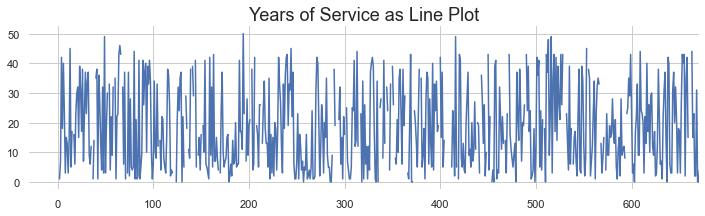

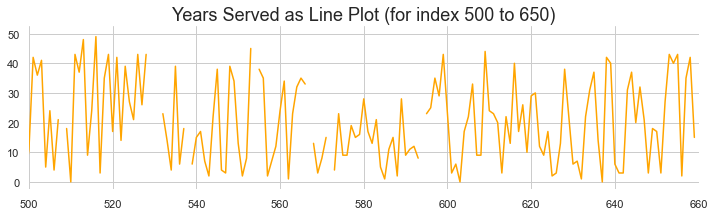

In [25]:
# copy combined_updated dataframe to combined_addex
dete_tafe_combined = dete_tafe_combined.copy()

print("Before Interpolation")

fig, ax = plt.subplots(figsize=(12,3))
ax = dete_tafe_combined["institute_service"].plot.line(linewidth=1.5)
ax.set_xlim(-30, 670)
ax.set_title("Years of Service as Line Plot", fontsize = 18)
for key, each_spine in ax.spines.items():
    each_spine.set_visible(False)
plt.show()

fig, ax = plt.subplots(figsize=(12,3))
ax = dete_tafe_combined["institute_service"].plot.line(linewidth=1.5, color = "orange")
ax.set_xlim(500, 660)
ax.set_title("Years Served as Line Plot (for index 500 to 650)", fontsize= 18)
for key, each_spine in ax.spines.items():
    each_spine.set_visible(False)
plt.show()

After Interpolation


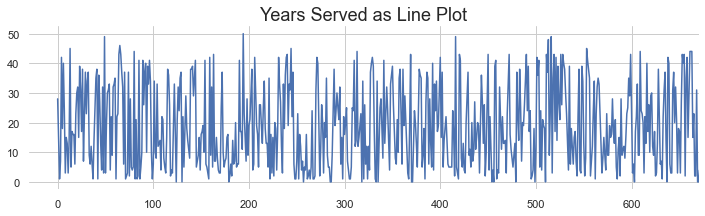

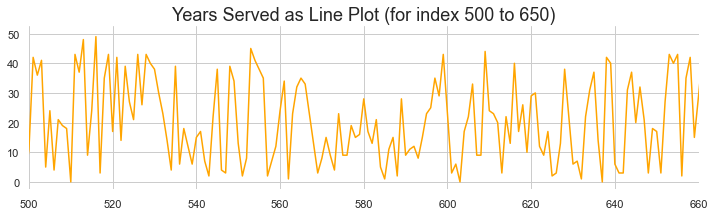

In [26]:
dete_tafe_combined["institute_service"] = dete_tafe_combined["institute_service"].interpolate().astype(int)

print("After Interpolation")

fig, ax = plt.subplots(figsize=(12,3))
ax = dete_tafe_combined["institute_service"].plot.line(linewidth=1.5)
ax.set_xlim(-30, 670)
ax.set_title("Years Served as Line Plot", fontsize=18)
for key, each_spine in ax.spines.items():
    each_spine.set_visible(False)
plt.show()

fig, ax = plt.subplots(figsize=(12,3))
ax = dete_tafe_combined["institute_service"].plot.line(linewidth=1.5, color = "orange")
ax.set_xlim(500, 660)
ax.set_title("Years Served as Line Plot (for index 500 to 650)", fontsize=18)
for key, each_spine in ax.spines.items():
    each_spine.set_visible(False)
plt.show()

### Compare years of service after interpolation

In [27]:
fig = px.histogram(data_frame = dete_tafe_combined, x = "institute_service", color = "dataset_label",
             labels = {"institute_service": "Years", "dataset_label": "Institute"},
             range_x = [-5, 55], barmode = "group")
fig.update_layout(height = 400, title = "Duration of Employment in Years at Institute", 
                  yaxis_title = "No. Of Employees",
                  legend = {"y": 1, "x": 0.5, "xanchor" : "center", "orientation": "h", "title": ""})
fig.show()

The highest number of exits are for TAFE that too with employees working for 1 or less than 1 year. Also, the employment data is diverse for DETE institute as compared to TAFE with employment duration upto 49 years at DETE for few employees.

### Classify years of service as Experience Levels

In [28]:
# replace the year number with experience definitions

# define function which would take each year and convert to experience level
def year_to_experience(year_val):
    if float(year_val) < 3.0:
        return "Novice"
    elif 3.0 <= float(year_val) < 7.0:
        return "Experienced"
    elif 7.0 <= float(year_val) < 11.0:
        return "Established"
    elif pd.isnull(year_val):
        return np.nan
    else:
        return "Veteran"
    
dete_tafe_combined["experience_level"] = dete_tafe_combined["institute_service"].apply(year_to_experience)

dete_tafe_combined["experience_level"].value_counts(dropna = False)

Veteran        696
Novice         377
Experienced    309
Established    141
Name: experience_level, dtype: int64

## Employee Age Groups

The experience level classiffication considers the employment duration of the employees at the institute. However, it does not take into account an employee age. Let's classify employees based on their age group.

In [29]:
dete_tafe_combined["age"].value_counts(dropna = False).sort_index()

20 or younger     17
21 – 25           44
21-25             40
26 – 30           50
26-30             57
31 – 35           52
31-35             39
36 – 40           51
36-40             51
41 – 45           80
41-45             61
46 – 50           59
46-50             63
51-55            185
56 or older      162
56-60            174
61 or older      222
NaN              116
Name: age, dtype: int64

In [30]:
age_correction = {"20 or younger" : "20 or below", "56 or older": "56-60", "61 or older": "60 or above"}

dete_tafe_combined["age"] = dete_tafe_combined["age"].str.replace(r" – ","-").replace(age_correction) 

fig = px.histogram(x = dete_tafe_combined["age"].sort_values(), 
                   color = dete_tafe_combined["dataset_label"] , barmode = "group", 
                   labels = {"x": "Age Group", "color" : "Institute"},
                   
                  )
fig.update_layout(height = 400, width = 850,
                  title = "Age group of Employees", 
                  legend = {"y": 1, "x": 0.5, "xanchor" : "center", "orientation": "h",
                            "title": ""},
                  yaxis = {"title" : "No. of Employees"})
fig.show()

Similar to experience years, age groups are also varied for DETE institute. However, for TAFE we only have 3 groups and they are all for age above 50 years. We have already identified TAFE has a higher percentage of exits as resignations. Let's examine if the resignations happened due to dissatisfaction at work.

## Resignations due to dissatisfaction at work

The dissatisfaction columns for both the surveys are different. For TAFE there are only two and for DETE there are 9. In addition the TAFE dataset values will need to be corrected as they don't have False values directly but as literal `"-"`. 

Since we can't say that the non-responders were satisfied or dissatisfied with their job prospects we will update None values as **No Data or NA (not applicable).**

In [31]:
# Columns selected for the section
tafe_diss_cols = ["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]

dete_diss_cols = ["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", 
                  "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions", 
                  "work_life_balance", "workload" ]

# columns combined in one list 
combined_cols = tafe_diss_cols + dete_diss_cols

In [32]:
print("Data present in TAFE dissatisfaction columns:", "\n")
for each in dete_tafe_combined[tafe_diss_cols].columns: 
    print(dete_tafe_combined[each].value_counts(), "\n")

Data present in TAFE dissatisfaction columns: 

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64 

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64 



In [33]:
print("Data present in some of the DETE dissatisfaction columns:", "\n")
for each in dete_tafe_combined[dete_diss_cols[:3]].columns: 
    print(dete_tafe_combined[each].value_counts(), "\n")

Data present in some of the DETE dissatisfaction columns: 

False    733
True      89
Name: job_dissatisfaction, dtype: int64 

False    761
True      61
Name: dissatisfaction_with_the_department, dtype: int64 

False    806
True      16
Name: physical_work_environment, dtype: int64 



In [34]:
# define function update_vals to convert dissatisfaction values in TAFE to comparable formats
def update_vals(vals):
    if pd.isnull(vals):
        return np.nan 
    elif vals == "-":
        return False
    else:
        return True

# apply update_vals function to TAFE institute columns only
dete_tafe_combined[tafe_diss_cols] = dete_tafe_combined.loc[:, tafe_diss_cols].applymap(update_vals)

# define function to replicate dataframe.any() method as it gives different results when applied to axis with None values
def classify_exit(input_row):
    elements = len(input_row)
    if [each for each in input_row].count(True) == 0:
        if [each for each in input_row].count(False) == 0:
            return "No data or NA"
        else: 
            return False
    else:
        return True    

# apply classify_exit function to all selected columns
dete_tafe_combined["dissatisfied"] = (dete_tafe_combined.loc[:, combined_cols].apply(classify_exit, axis = 1))

dete_tafe_combined["dissatisfied"].value_counts(dropna = False)

False            769
True             490
No data or NA    264
Name: dissatisfied, dtype: int64

In [35]:
# pd.DataFrame({"No data count": dete_tafe_combined.isnull().sum(), 
#               "No data count %": (dete_tafe_combined.isnull().sum()/dete_tafe_combined.shape[0]).mul(100)})

# to remove non-essential columns from combined data
dete_tafe_combined.dropna(thresh = 1000, axis =1, inplace = True)

### Visualize exits caused due to dissatisfaction at work

In [136]:
df = dete_tafe_combined.groupby(["separationtype", "dissatisfied"], as_index = False)["dataset_label"].count()

fig = px.bar(x = df["separationtype"], y = df["dataset_label"], orientation = "v",
             color = df["dissatisfied"], barmode = "group", 
             text = df["dataset_label"], 
             labels = {"x": "Reasons for Exit", "y": "No. of Employees", "color": "Dissatisfied with work?"})

fig.update_layout(legend = {"title": "", "xanchor" : "right", "orientation" : "h", "x" : 1, "y": 1.2},
                  title = "Separation due to dissatisfaction at work", 
                  yaxis = {"visible": False}) 
fig.show()

Based on the above analysis, we can conclude that a majority of the employees who resigned from their jobs were dissatisfied at work. However one group **Retirement** stands out with the dissatisfied employees sightly more than the satisfied employees. 

Let's analyze if this is result is applicable to both the institutes.

In [37]:
df = dete_tafe_combined[dete_tafe_combined["dissatisfied"] == True]

df = df.groupby(["separationtype", "dataset_label"], 
                as_index = False)["dissatisfied"].sum()

fig = px.bar(y = df["separationtype"], x = df["dissatisfied"], color = df["dataset_label"], 
             orientation = "h", height = 400,
             text = df["dissatisfied"], range_x = [-2,240])

fig.update_layout(title = "Separation reasons with maximum dissatisfied employees", 
                  legend = {"title":"", "orientation": "h", "x": 0.5, "y": 1},
                  xaxis_visible = False, yaxis_title = "")
fig.show()

The retirement group at DETE was more dissatisfied than at the TAFE institute.

### Visualize separation reasons by experience level

In [206]:
df = dete_tafe_combined.groupby(["separationtype", "experience_level"], as_index = False)["dataset_label"].count()

exp_level = ["Novice", "Experienced", "Established", "Veteran"]

row_col = [(1, 1), (1, 2), (2, 1), (2, 2)]

fig = make_subplots(rows = 2, cols = 2, shared_yaxes = True, shared_xaxes = True, 
                    vertical_spacing = 0.15,
                    subplot_titles = [level for level in exp_level])

for i in range(0,4):
    temp_df = df[df["experience_level"] == exp_level[i]]
    
    fig.add_scatter(y = temp_df["separationtype"], x = temp_df["dataset_label"], 
                    mode = "markers+lines", marker = {"sizemode" : "area", "size" : temp_df["dataset_label"]},
                    name = exp_level[i],
                    row = row_col[i][0], col = row_col[i][1], )

fig.update_layout(showlegend = False, title = "Separation Reasons by Employee Experience Levels")
fig.show()

In [205]:
df = dete_tafe_combined[dete_tafe_combined["dissatisfied"] == True].groupby(
    ["separationtype", "experience_level"], as_index = False)["dataset_label"].count()

y_labels = dete_tafe_combined["separationtype"].unique()

exp_level = ["Novice", "Experienced", "Established", "Veteran"]

row_col = [(1, 1), (1, 2), (2, 1), (2, 2)]

fig = make_subplots(rows = 2, cols = 2, shared_yaxes = True, shared_xaxes = True, 
                    vertical_spacing = 0.15,
                    subplot_titles = [level for level in exp_level])

for i in range(0,4):
    temp_df = df[df["experience_level"] == exp_level[i]]
    
    fig.add_scatter(y = y_labels, x = temp_df["dataset_label"], 
                    mode = "markers+lines", marker = {"sizemode" : "area", "size" : temp_df["dataset_label"]},
                    name = exp_level[i],
                    row = row_col[i][0], col = row_col[i][1])

fig.update_layout(showlegend = False, title = "Separation Reasons for Dissatisfied Employees by thier Experience Levels")
fig.show()